STEPS TO IMPLIMENT THE GRADIENT DECENT

STEP 1:

Binary Classification Using Random Points.

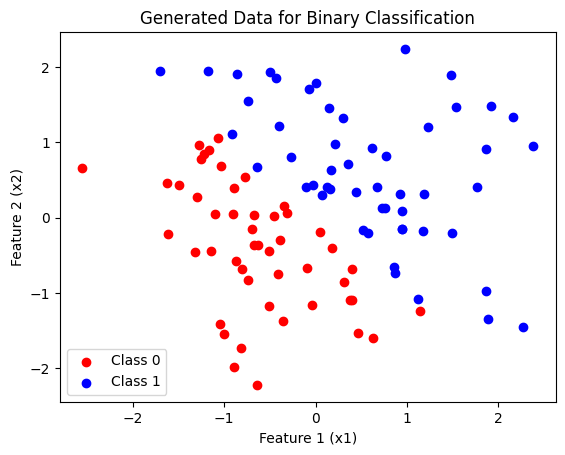

In [2]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.randn(100, 2)  
y = (X[:, 0] + X[:, 1] > 0).astype(int) 


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.legend()
plt.title('Generated Data for Binary Classification')
plt.show()

STEP2:

Build the Simple Neural Network

1. The neural network has:
2. Input Layer: 2 neurons (one for each feature).
3. Hidden Layer: 3 neurons.
4. Output Layer: 1 neuron (binary output).

In [3]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


input_layer_size = 2 
hidden_layer_size = 3  
output_layer_size = 1  

np.random.seed(1)
W1 = np.random.randn(input_layer_size, hidden_layer_size)  
b1 = np.zeros((1, hidden_layer_size))  
W2 = np.random.randn(hidden_layer_size, output_layer_size) 
b2 = np.zeros((1, output_layer_size))  


STEP3:

Loss Function (REGRESSION) :

MSE = 1/n (n)mean(i=1)(

We will use binary cross-entropy for the loss function.

What is a Loss Function??

A loss function (also known as an error function) is a mathematical function used to measure the difference between the model's predictions and the actual (true) values in a machine learning model. The loss function is critical in training a model because it quantifies how well the model is performing. The goal during training is to minimize this loss, which means the model's predictions become more accurate over time.

In [4]:
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Let's Implement the forward and backward passes for training the neural network with gradient descent.

Epoch 0, Loss: 0.7667669290260503
Epoch 100, Loss: 0.4822059507679113
Epoch 200, Loss: 0.34203808962973126
Epoch 300, Loss: 0.24843510787555448
Epoch 400, Loss: 0.19103708110707554
Epoch 500, Loss: 0.15517196842210979
Epoch 600, Loss: 0.1314462661813816
Epoch 700, Loss: 0.11478904855533445
Epoch 800, Loss: 0.10246796330105612
Epoch 900, Loss: 0.09296438918345501


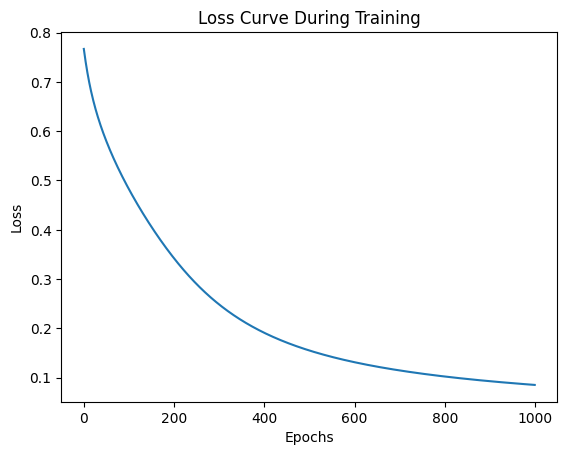

In [5]:
learning_rate = 0.1
epochs = 1000
losses = []

#loop for trainig the data
for epoch in range(epochs):
    # Forward Pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Final output

    # Calculation of loss
    loss = binary_cross_entropy(y.reshape(-1, 1), A2)
    losses.append(loss)

    # Backward Pass (Gradient Descent)
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2) / X.shape[0]
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1) / X.shape[0]

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.show()


After training the network, we can visualize how well it learned by plotting the decision boundary.

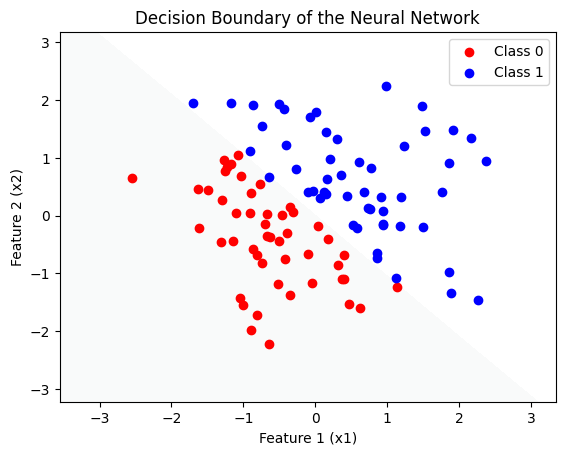

In [6]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = sigmoid(np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap="RdBu", alpha=0.6)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.legend()
plt.title('Decision Boundary of the Neural Network')
plt.show()
